<a href="https://www.kaggle.com/code/masatomurakawamm/transformer-vs-gmlp-with-without-self-attention?scriptVersionId=106777226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
# [Spaceship Titanic][1]

We are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

---
## The aim of this notebook:
- **To implement TabTransformer and gMLP models from scratch with PyTorch.**
- **To compare these two models' performances.**

## Results:
- **The public score of gMLP model, which has 37,082 parameters, and that of TabTransformer, which has 32,497 parameters, were almost the same (Ver. 19 & 20).**

---
**TabTransformer** is a deep neural network for tabular data modeling built upon self-attention mechanism proposed by researchers at Amazon in 2020. The model architecture is as follows:

<img src="https://raw.githubusercontent.com/keras-team/keras-io/master/examples/structured_data/img/tabtransformer/tabtransformer.png" width="400"/>

- I explained and implemented TabTransformer in <a href="#4.2">Chapter 4.2</a>.
- For a deeper understanding of this model, please refer to [the original paper][6].

---
**gMLP (gated multi-layer perceptron)** was introduced in 2021 by researchers at Google as an MLP-based alternative to Transformers. In the paper, authors showed that it can perform as well as Transformers in key language and vision applications even without self-attention mechanism. gMLP block has following structure:

<img src="https://production-media.paperswithcode.com/methods/641e1c00-a87b-40ce-a0ab-af50ac6aa318.png" width="700"/>

- I explained and implemented gMLP in <a href="#4.3">Chapter 4.3</a>.
- For a deeper understanding of this model, please refer to [the original paper][7].

---
In addition, there is a model named **GatedTabTransformer** which comprises both Transformer layers and gMLP blocks shown in figure below. I explained and implemented GatedTabTransformer in [version 14 of this notebook][8]. If you are interested in, please look that back.

<img src="https://github.com/radi-cho/GatedTabTransformer/raw/master/paper/media/GatedTabTransformer-architecture.png" width="400"/>
 
 - For a deeper understanding of this model, please refer to [the original paper][9].
 
---
**References:** Thanks to previous great codes and notebooks.
- [🔥🔥[TensorFlow]TabTransformer🔥🔥][2]
- [Structured data learning with TabTransformer][3]

**My Previous Notebooks:**

- I have implemented TabTransformer from scratch with TensorFlow in [SpaceshipTitanic: EDA + TabTransformer[TensorFlow]][4].
- Please note that EDA and Feature Engineering parts in this notebook are same as my previous notebooks below. If you have read it, you can <a href="#4">skip over chapter3</a>.
 - [SpaceshipTitanic: EDA + TabTransformer[TensorFlow]][4]
 - [TabNet: DNN+DecisionTree [Library & fromScratch]][5]

---
### **If you find this notebook useful, or when you copy&edit this notebook, please do give me an upvote. It helps me keep up my motivation.**

---
[1]: https://www.kaggle.com/competitions/spaceship-titanic/overview
[2]: https://www.kaggle.com/code/usharengaraju/tensorflow-tabtransformer
[3]: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/structured_data/ipynb/tabtransformer.ipynb
[4]: https://www.kaggle.com/code/masatomurakawamm/spaceshiptitanic-eda-tabtransformer-tensorflow
[5]: https://www.kaggle.com/code/masatomurakawamm/tabnet-dnn-decisiontree-library-fromscratch
[6]: https://arxiv.org/abs/2012.06678
[7]: https://arxiv.org/abs/2105.08050
[8]: https://www.kaggle.com/code/masatomurakawamm/gatedtabtransformer-pytorch-dnn-attention-gmlp?scriptVersionId=105961156
[9]: https://arxiv.org/abs/2201.00199

<span id='toc'/>

<h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>0. TABLE OF CONTENTS</center></h1>

<ul class="list-group" style="list-style-type:none;">
    <li><a href="#1" class="list-group-item list-group-item-action">1. Settings</a></li>
    <li><a href="#2" class="list-group-item list-group-item-action">2. Data Loading</a></li>
    <li><a href="#3" class="list-group-item list-group-item-action">3. EDA and Feature Engineering</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#3.1" class="list-group-item list-group-item-action">3.1 Exploratory Data Analysis</a></li>
            <li><a href="#3.2" class="list-group-item list-group-item-action">3.2 Dataset</a></li>
        </ul>
    </li>
    <li><a href="#4" class="list-group-item list-group-item-action">4. Model</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#4.1" class="list-group-item list-group-item-action">4.1 Preprocessing Model</a></li>
            <li><a href="#4.2" class="list-group-item list-group-item-action">4.2 TabTransformer</a></li>
            <li><a href="#4.3" class="list-group-item list-group-item-action">4.3 gMLP Model</a></li>
        </ul>
    </li>
    <li><a href="#5" class="list-group-item list-group-item-action">5. Training</a></li>
    <li><a href="#6" class="list-group-item list-group-item-action">6. Prediction</a></li>
</ul>


<a id ="1"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>1. Settings</center></h1>
[Back to the TOC](#toc)

In [1]:
## Parameters
data_config = {
    'train_csv_path': '../input/spaceship-titanic/train.csv',
    'test_csv_path': '../input/spaceship-titanic/test.csv',
    'sample_submission_path': '../input/spaceship-titanic/sample_submission.csv',
}

exp_config = {
    'n_bins': 10,
    'n_splits': 5,
    'batch_size': 512,
    'learning_rate': 5e-4,
    'weight_decay': 0.0001,
    'train_epochs': 30,
    'checkpoint_filepath': './tmp/model/checkpoint.cpt',
    'finalize': True,
    'finalize_epochs': None,
    'finalized_filepath': './tmp/model/finalized.cpt',
}

model_config = {
    'model': 'gmlp',  ##  'tabtransformer' or 'gmlp'
    'cat_embedding_dim': 12,  ## parameter for both TabTransformer and gMLP
    'num_transformer_blocks': 4,  ## TabTransformer's parameter
    'num_heads': 3,  ## TabTransformer's parameter
    'tf_dropout_rates': [0., 0., 0., 0.,],  ## TabTransformer's parameter
    'ff_dropout_rates': [0., 0., 0., 0.,],  ## TabTransformer's parameter
    'mlp_dropout_rates': [0.2,],  ## TabTransformer's parameter
    'mlp_hidden_units_factors': [1],  ## TabTransformer's parameter
    'num_proj_factor': 4,  ## TabTransformer's parameter
    'gmlp_num_blocks': 30,  ## gMLP's parameter
    'gmlp_split': True,  ## gMLP's parameter
    'gmlp_proj_factor': 3,  ## gMLP's parameter
    'gmlp_dropout': [0.,],  ## gMLP's parameter
    'mlp_factors': [],  ## gMLP's parameter
    'gmlp_init_eps': 1e-3,  ## gMLP's parameter
    'feature_pooling': False,  ## gMLP's parameter
}

print('Parameters setted!')

Parameters setted!


In [2]:
## Import dependencies 
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os, sys, pathlib, gc
import re, math, random, time
import datetime as dt
from tqdm import tqdm
from typing import Optional, Union, Tuple
from collections import OrderedDict

import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')

print('import done!')

import done!


In [3]:
## For reproducible results    
def seed_all(s):
    random.seed(s)
    np.random.seed(s)
    tf.random.set_seed(s)
    torch.manual_seed(s)
    torch.cuda.manual_seed(s)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['PYTHONHASHSEED'] = str(s) 
    print('Seeds setted!')
global_seed = 42
seed_all(global_seed)

## Limit GPU Memory in TensorFlow
## Because TensorFlow, by default, allocates the full amount of available GPU memory when it is launched. 
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
        print('{} memory growth: {}'.format(device, tf.config.experimental.get_memory_growth(device)))
else:
    print("Not enough GPU hardware devices available")
    
## For Seaborn Setting
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha': 0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': '#fdfcf6',
    'axes.facecolor': '#fdfcf6',
}
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
sns.set_theme(
    style='whitegrid',
    #palette=sns.color_palette(cluster_colors),
    rc=custom_params,)

Seeds setted!
Not enough GPU hardware devices available


<a id ="2"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>2. Data Loading</center></h1>
[Back to the TOC](#toc)

---
### [File and Data Field Descriptions](https://www.kaggle.com/competitions/spaceship-titanic/data)

- **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
 - `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
 - `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
 - `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
 - `Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for *Port* or `S` for *Starboard*.
 - `Destination` - The planet the passenger will be debarking to.
 - `Age` - The age of the passenger.
 - `VIP` - Whether the passenger has paid for special VIP service during the voyage.
 - `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the *Spaceship Titanic*'s many luxury amenities.
 - `Name` - The first and last names of the passenger.
 - `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


- **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of `Transported` for the passengers in this set.


- **sample_submission.csv** - A submission file in the correct format.
 - `PassengerId` - Id for each passenger in the test set.
 - `Transported` - The target. For each passenger, predict either *True* or *False*.

---
### [Submission & Evaluation](https://www.kaggle.com/competitions/spaceship-titanic/overview/evaluation)

- Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

---

In [4]:
## Data Loading
train_df = pd.read_csv(data_config['train_csv_path'])
test_df = pd.read_csv(data_config['test_csv_path'])
submission_df = pd.read_csv(data_config['sample_submission_path'])

print(f'train_length: {len(train_df)}')
print(f'test_lenght: {len(test_df)}')
print(f'submission_length: {len(submission_df)}')

train_length: 8693
test_lenght: 4277
submission_length: 4277


In [5]:
## Null Value Check
print('train_df.info()'); print(train_df.info(), '\n')
print('test_df.info()'); print(test_df.info(), '\n')

## train_df Check
train_df.head()

train_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None 

test_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


---
There are some missing values.

---

<a id ="3"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>3. EDA and Feature Engineering</center></h1>
[Back to the TOC](#toc)

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Data Preprocessing</center></h2>

In [6]:
## Feature Selection
numerical_columns = ['Age', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns = ['PassengerId', 'HomePlanet', 'CryoSleep',
                       'Cabin', 'Destination', 'VIP', 'Name']
target = 'Transported'

## Number of unique values in each categorical features.
categorical_n_unique = {cc: train_df[cc].nunique() \
                        for cc in categorical_columns}
categorical_n_unique

{'PassengerId': 8693,
 'HomePlanet': 3,
 'CryoSleep': 2,
 'Cabin': 6560,
 'Destination': 3,
 'VIP': 2,
 'Name': 8473}

In [7]:
## Function for Data Preprocessing
def preprocess_df(dataframe):
    df = dataframe.copy()
    
    ## Drop 'Name'
    df = df.drop(['Name'], axis=1)
    
    ## Transform 'Transported' column to 0 or 1.
    if 'Transported' in df.columns:
        df.loc[df['Transported']==True, 'Transported'] = 1.
        df.loc[df['Transported']==False, 'Transported'] = 0.
        df['Transported'] = df['Transported'].astype('int64')
    
    ## Transform True-False features (CryoSleep and VIP) to 'Yes' or 'No'.
    df.loc[df['CryoSleep']==True, 'CryoSleep'] = 'Yes'
    df.loc[df['CryoSleep']==False, 'CryoSleep'] = 'No'
    df['CryoSleep'] = df['CryoSleep'].astype(str)
    
    df.loc[df['VIP']==True, 'VIP'] = 'Yes'
    df.loc[df['VIP']==False, 'VIP'] = 'No'
    df['VIP'] = df['VIP'].astype(str)
    
    ## Transform the dtypes of HomePlanet and Destination to str
    df['HomePlanet'] = df['HomePlanet'].astype(str)
    df['Destination'] = df['Destination'].astype(str)
    
    return df

train = preprocess_df(train_df)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,No,B/0/P,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,No,F/0/S,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,No,A/0/S,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,No,A/0/S,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,No,F/1/S,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,1


**Caution: After `astype(str)`, null values (np.nan) are replaced by the string 'nan'.**

In [8]:
## Handle 'Cabin' feature
def cabin_split(dataframe):
    df = dataframe.copy()
    
    df['Cabin'] = df['Cabin'].astype(str)
    cabins = df['Cabin'].str.split('/', expand=True)
    cabins.columns = ['Cabin_0', 'Cabin_1', 'Cabin_2']
    
    df = pd.concat([df, cabins], axis=1)
    df = df.drop(['Cabin'], axis=1)
    df['Cabin_0'].astype(str)
    df['Cabin_1'] = pd.to_numeric(df['Cabin_1'], errors='coerce')
    df['Cabin_2'].astype(str)
    df['Cabin_2'] = df['Cabin_2'].map(lambda x: 'nan' if x is None else x)
    
    return df

train = cabin_split(train)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_0,Cabin_1,Cabin_2
0,0001_01,Europa,No,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,0002_01,Earth,No,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,0003_01,Europa,No,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S
3,0003_02,Europa,No,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S
4,0004_01,Earth,No,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S


<a id ="3.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.1 Exploratory Data Analysis</center></h2>
[Back to the TOC](#toc)

<a id ="3.1.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Target Distribution </center></h2>

In [9]:
## Count positive and negative 'Transported'
train_pos = train.query('Transported==1').reset_index(drop=True)
train_neg = train.query('Transported==0').reset_index(drop=True)
print(f'positive samples: {len(train_pos)}, negative samples: {len(train_neg)}')

positive samples: 4378, negative samples: 4315


In [10]:
## Target Distribution
target_count = train.groupby(['Transported'])['PassengerId'].count()
target_percent = target_count / target_count.sum()

fig = go.Figure()
data = go.Bar(x=target_count.index.astype(str).values, 
              y=target_count.values)
fig.add_trace(data)
fig.update_layout(title = dict(text="Target distribution"),
                  xaxis = dict(title="'Transported' values"),
                  yaxis = dict(title='counts'))
fig.show()

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Numerical Features </center></h2>

In [11]:
## Statistics of Numerical Features
train.describe().T.style.bar(subset=['mean'],)\
                        .background_gradient(subset=['std'], cmap='coolwarm')\
                        .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000
Cabin_1,8494.000000,600.367671,511.867226,0.000000,167.250000,427.000000,999.000000,1894.000000


In [12]:
## Statistics based on 'Transported' (pos or neg)
train.groupby('Transported').describe().T

Transported                    0             1
Age          count   4226.000000   4288.000000
             mean      29.922858     27.748834
             std       13.699262     15.151705
             min        0.000000      0.000000
             25%       21.000000     18.000000
             50%       27.000000     26.000000
             75%       38.000000     37.000000
             max       79.000000     78.000000
RoomService  count   4217.000000   4295.000000
             mean     389.266066     63.098021
             std      875.638123    274.812497
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      473.000000      0.000000
             max    14327.000000   3992.000000
FoodCourt    count   4231.000000   4279.000000
             mean     382.615930    532.691984
             std     1200.115601   1931.306995
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%      179.000000      0.000000
             max    16856.000000  29813.000000
ShoppingMall count   4221.000000   4264.000000
             mean     167.566217    179.829972
             std      456.528126    722.026714
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%       95.000000      0.000000
             max    10705.000000  23492.000000
Spa          count   4223.000000   4287.000000
             mean     564.382666     61.675531
             std     1551.356047    262.682871
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        4.000000      0.000000
             75%      453.500000      0.000000
             max    22408.000000   4103.000000
VRDeck       count   4225.000000   4280.000000
             mean     543.629822     69.148131
             std     1563.088368    291.658171
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      388.000000      0.000000
             max    24133.000000   5063.000000
Cabin_1      count   4216.000000   4278.000000
             mean     623.619070    577.453249
             std      525.438037    497.129959
             min        0.000000      0.000000
             25%      182.000000    154.000000
             50%      448.500000    385.000000
             75%     1060.000000    964.000000
             max     1894.000000   1893.000000

In [13]:
## Values at 90, 95, 98, 99, 100 % quantiles.
quantiles = [0.9, 0.95, 0.98, 0.99, 1]
train_quantile_values = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].quantile(quantiles)
train_quantile_values

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0.90,753.00,1026.00,619.60,732.00,732.60
0.95,1274.25,2748.50,927.80,1607.10,1534.20
0.98,2213.90,5208.74,1749.32,3731.56,3654.96
0.99,3096.23,8033.31,2333.44,5390.10,5646.68
1.00,14327.00,29813.00,23492.00,22408.00,24133.00


---
#### There seems to be outliers...

---

In [14]:
## Clipping outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values=None, quantile=0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].quantile(quantile)
    
    for num_column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values    
    return df

train = clipping_quantile(train, quantile_values=None, quantile=0.99)

## Statistics after clipping outliers
train.describe().T.style.bar(subset=['mean'],)\
                        .background_gradient(subset=['std'], cmap='coolwarm')\
                        .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,207.556248,528.543529,0.000000,0.000000,0.000000,47.000000,3096.230000
FoodCourt,8510.000000,415.275988,1246.172856,0.000000,0.000000,0.000000,76.000000,8033.310000
ShoppingMall,8485.000000,154.611597,402.218859,0.000000,0.000000,0.000000,27.000000,2333.440000
Spa,8510.000000,275.967991,829.249879,0.000000,0.000000,0.000000,59.000000,5390.100000
VRDeck,8505.000000,269.573249,835.468811,0.000000,0.000000,0.000000,46.000000,5646.680000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000
Cabin_1,8494.000000,600.367671,511.867226,0.000000,167.250000,427.000000,999.000000,1894.000000


In [15]:
## Statistics based on 'Transported' (after Clipping Outliers)
train.groupby('Transported').describe().T

Transported                   0            1
Age          count  4226.000000  4288.000000
             mean     29.922858    27.748834
             std      13.699262    15.151705
             min       0.000000     0.000000
             25%      21.000000    18.000000
             50%      27.000000    26.000000
             75%      38.000000    37.000000
             max      79.000000    78.000000
RoomService  count  4217.000000  4295.000000
             mean    355.263133    62.531816
             std     669.059108   267.834337
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       1.000000     0.000000
             75%     473.000000     0.000000
             max    3096.230000  3096.230000
FoodCourt    count  4231.000000  4279.000000
             mean    366.197677   463.803760
             std    1055.354287  1408.125909
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       0.000000     0.000000
             75%     179.000000     0.000000
             max    8033.310000  8033.310000
ShoppingMall count  4221.000000  4264.000000
             mean    159.067491   150.200638
             std     363.729980   436.991977
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       0.000000     0.000000
             75%      95.000000     0.000000
             max    2333.440000  2333.440000
Spa          count  4223.000000  4287.000000
             mean    493.508075    61.675531
             std    1105.389588   262.682871
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       4.000000     0.000000
             75%     453.500000     0.000000
             max    5390.100000  4103.000000
VRDeck       count  4225.000000  4280.000000
             mean    472.607451    69.148131
             std    1112.278126   291.658171
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       1.000000     0.000000
             75%     388.000000     0.000000
             max    5646.680000  5063.000000
Cabin_1      count  4216.000000  4278.000000
             mean    623.619070   577.453249
             std     525.438037   497.129959
             min       0.000000     0.000000
             25%     182.000000   154.000000
             50%     448.500000   385.000000
             75%    1060.000000   964.000000
             max    1894.000000  1893.000000

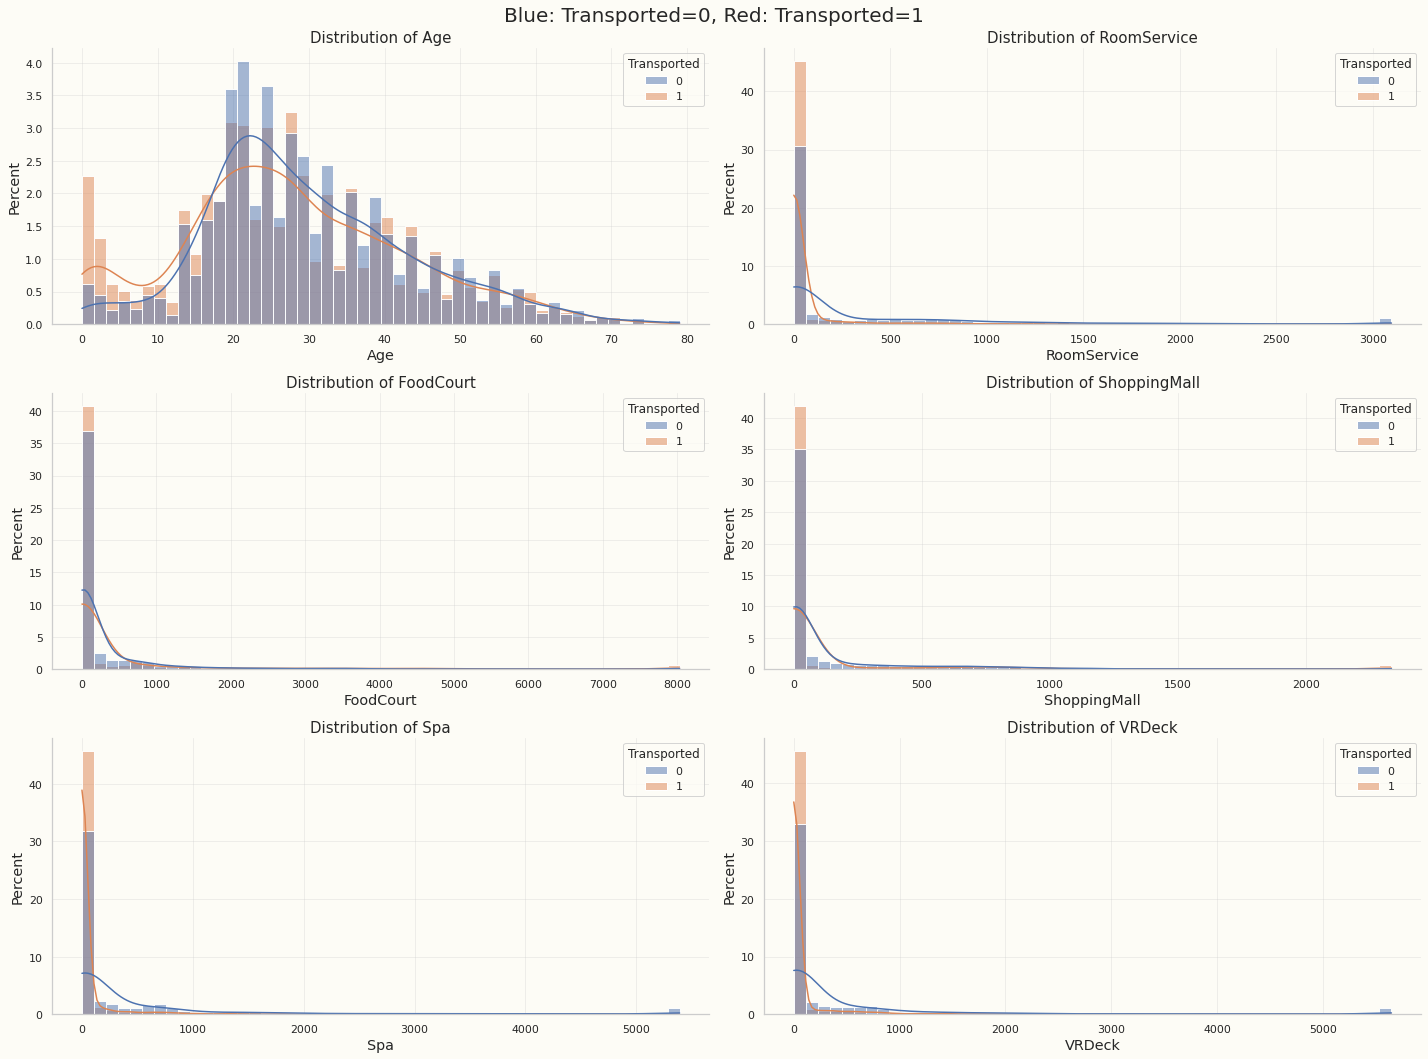

In [16]:
## Distribution of Numerical Features after Clipping Outliers
n_cols = 2
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,15))

bins = 50
for i, column in enumerate(numerical_columns):
    q, mod = divmod(i, n_cols)
    sns.histplot(x=column, data=train,
                 hue='Transported', ax=axes[q][mod],
                 bins=bins, stat="percent",
                 kde=True, legend=True)
    axes[q][mod].set_title(f'Distribution of {numerical_columns[i]}',size=15)
    
fig.suptitle('Blue: Transported=0, Red: Transported=1', fontsize=20)
fig.tight_layout()
plt.show()

In [17]:
## Heat Map of Correlation Matrix
fig = px.imshow(
    train.corr(),
    color_continuous_scale='RdBu_r',
    color_continuous_midpoint=0, 
    aspect='auto'
)

fig.update_layout(
    height=500, 
    width=500,
    title="Heatmap",
    showlegend=False
)

fig.show()

### Binning Numerical Features

---
Binning Method
- `Age`: 0 to 100 at intervals of 5.
- `other numerical features`: Split into 10 bins.
 - 1. Value=0 is the first bin ( get by (-1, 0] ).
 - 2. Get quantiles at [ 0, 0.9, 0.95, 0.99, 1 ].
 - 3. Split between quantiles_0 and quantiles_0.9 into 6 bins.
 - 4. Use quantiles_0.95, _0.99, _1 for the rest boundary.
 
---

In [18]:
## Helper Functions
def bin_split(dataframe, column, n_bins, thresholds=None):
    if thresholds is None:
        if column == 'Age':
            bins = np.array([i*5 for i in range(21)])
        else:
            bins = np.array([-1, ])
            x = dataframe[column]
            x_quantiles = x.quantile([0, 0.9, 0.95, 0.99, 1])
            bins = np.append(bins, [i * ((x_quantiles.iloc[1] - x_quantiles.iloc[0]) / (n_bins-4)) for i in range(n_bins-4)])
            bins = np.append(bins, [x_quantiles.iloc[1], x_quantiles.iloc[2], x_quantiles.iloc[3], x_quantiles.iloc[4]+1])
    else:
        bins = thresholds[column]
        
    splits = pd.cut(dataframe[column], bins=bins, labels=False, right=True)
    return splits, bins

def binning(dataframe, numerical_columns, n_bins, thresholds=None):
    df = dataframe.copy()
    df_split_bins = {}
    for num_column in numerical_columns:
        splits, bins = bin_split(df, num_column, n_bins, thresholds)
        df[num_column] = splits
        df_split_bins[num_column] = bins    
    return df, df_split_bins

n_bins = exp_config['n_bins']
train, train_split_bins = binning(train, numerical_columns, n_bins, thresholds=None)

for key in train_split_bins:
    print(f'{key} bins: \n{train_split_bins[key]}\n\n')

Age bins: 
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]


RoomService bins: 
[-1.0000000e+00  0.0000000e+00  1.2550000e+02  2.5100000e+02
  3.7650000e+02  5.0200000e+02  6.2750000e+02  7.5300000e+02
  1.2742500e+03  3.0955447e+03  3.0972300e+03]


FoodCourt bins: 
[-1.0000000e+00  0.0000000e+00  1.7100000e+02  3.4200000e+02
  5.1300000e+02  6.8400000e+02  8.5500000e+02  1.0260000e+03
  2.7485000e+03  8.0299521e+03  8.0343100e+03]


ShoppingMall bins: 
[-1.00000000e+00  0.00000000e+00  1.03266667e+02  2.06533333e+02
  3.09800000e+02  4.13066667e+02  5.16333333e+02  6.19600000e+02
  9.27800000e+02  2.33223040e+03  2.33444000e+03]


Spa bins: 
[-1.000000e+00  0.000000e+00  1.220000e+02  2.440000e+02  3.660000e+02
  4.880000e+02  6.100000e+02  7.320000e+02  1.607100e+03  5.389281e+03
  5.391100e+03]


VRDeck bins: 
[-1.0000000e+00  0.0000000e+00  1.2210000e+02  2.4420000e+02
  3.6630000e+02  4.8840000e+02  6.1050000e+02  7.3260000e+02
  1.5342000e+

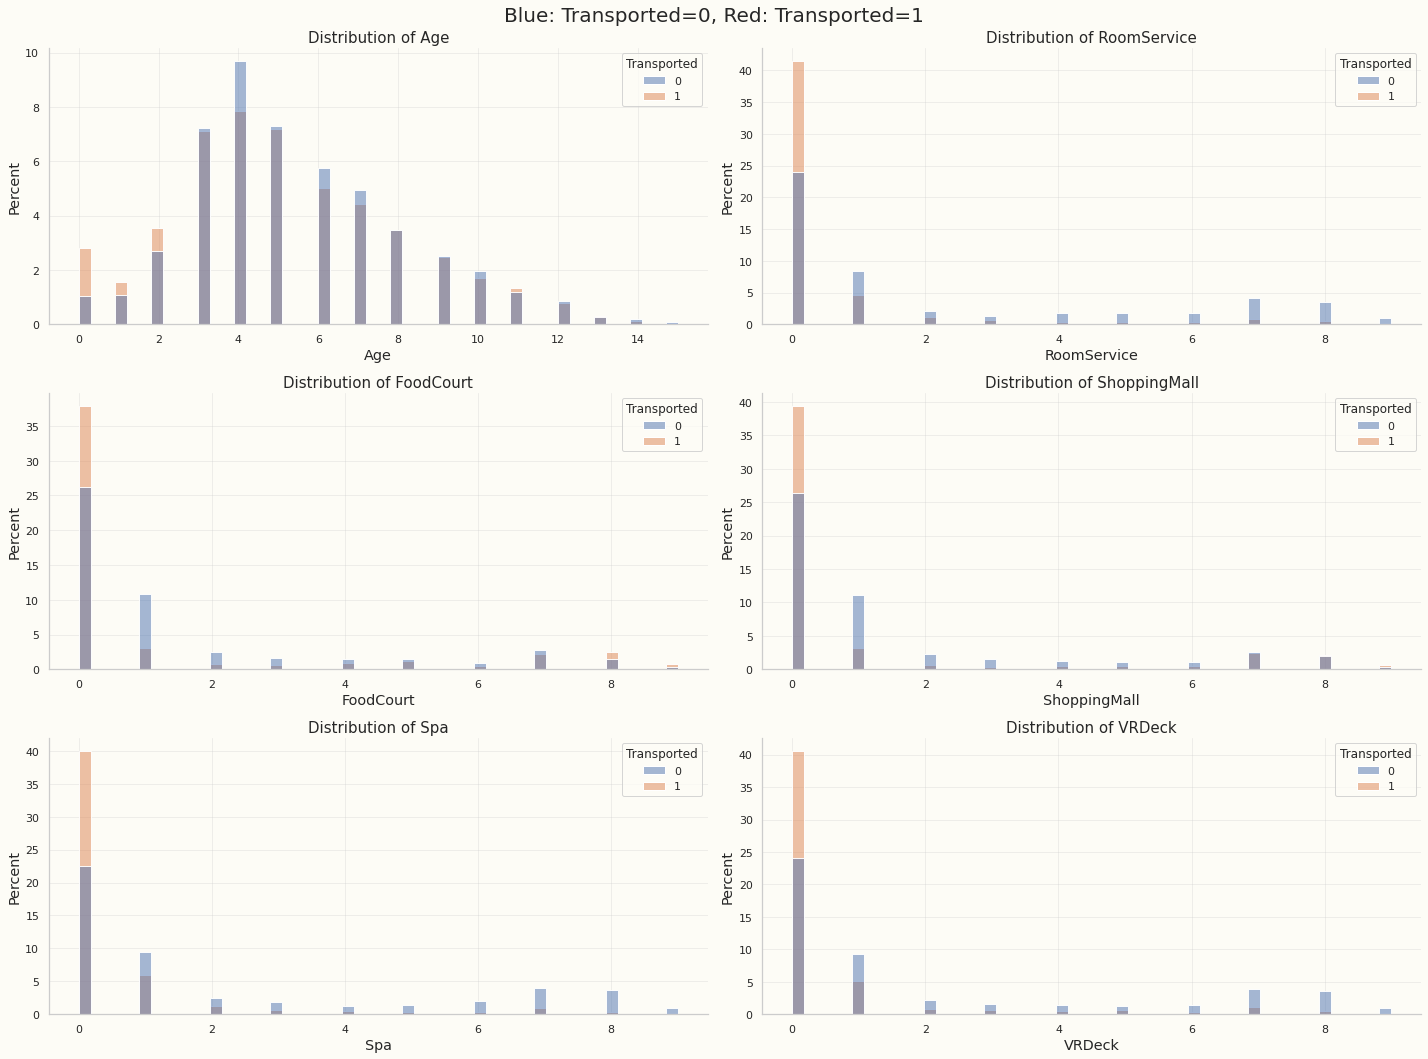

In [19]:
## Distribution of Numerical Features after Binning
n_cols = 2
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,15))

bins = 50
for i, column in enumerate(numerical_columns):
    q, mod = divmod(i, n_cols)
    sns.histplot(
        x=column, 
        data=train, 
        hue='Transported', 
        ax=axes[q][mod], 
        bins=bins, 
        stat="percent", 
        legend=True
    )
    axes[q][mod].set_title(f'Distribution of {numerical_columns[i]}',size=15)
    
fig.suptitle('Blue: Transported=0, Red: Transported=1', fontsize=20)
fig.tight_layout()
plt.show()

<a id ="3.1.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Categorical Features</center></h2>

In [20]:
## Distribution of Categorical Features
categorical_columns = ['HomePlanet', 'CryoSleep',
                       'Destination', 'VIP']

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=categorical_columns,
    shared_yaxes='all'
)

for i in range(2):
    for j in range(2):
        n = i*2 + j
        data0 = go.Histogram(
            x=train_neg[categorical_columns[n]],
            marker = dict(color='#0000FF'), ## Blue
            name='Transporetd=0'
        )
        data1 = go.Histogram(
            x=train_pos[categorical_columns[n]],
            marker = dict(color='#FF0000'), ## Red
            name='Transported=1'
        )
        
        fig.add_trace(data0, row=i+1, col=j+1)
        fig.add_trace(data1, row=i+1, col=j+1)
        
        fig.update_traces(opacity=0.75, histnorm='probability')
        #fig.update_layout(barmode='overlay')

fig.update_layout(title = dict(text='Blue: Transported=0, Red: Transported=1'),
                  showlegend=False,)
fig.update_yaxes(title='probability', row=1, col=1)
fig.update_yaxes(title='probability', row=2, col=1)
fig.show()

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Cabin Features</center></h2>

<AxesSubplot:xlabel='Cabin_0', ylabel='count'>

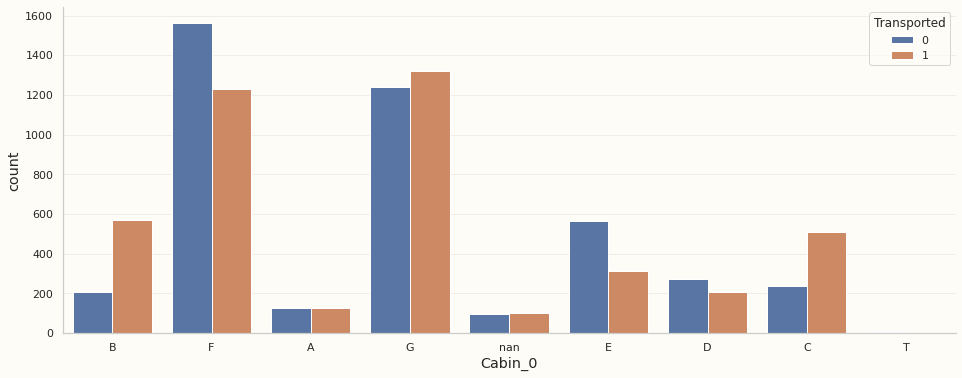

In [21]:
## 'Cabin_0'
sns.countplot(x='Cabin_0', data=train, hue='Transported')

<AxesSubplot:xlabel='Cabin_1', ylabel='Count'>

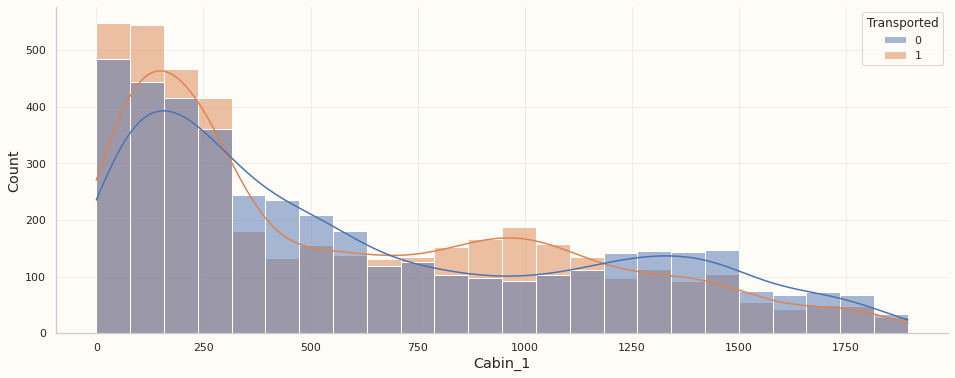

In [22]:
## 'Cabin_1'
sns.histplot(x='Cabin_1', data=train, hue='Transported', kde=True)

<AxesSubplot:xlabel='Cabin_2', ylabel='count'>

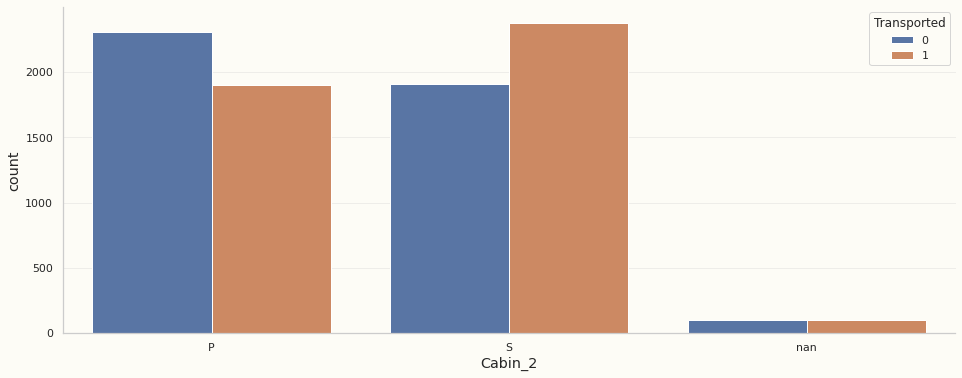

In [23]:
## 'Cabin_2'
sns.countplot(x='Cabin_2', data=train, hue='Transported')

### Binning 'Cabin_1'

In [24]:
## Histogram of 'Cabin_1' by Plotly (interactive)
fig = go.Figure()

data0 = go.Histogram(
    x=train_neg['Cabin_1'],
    marker = dict(color='#0000FF'), # Blue
    opacity=0.6,
    name='Transporetd=0'
)
data1 = go.Histogram(
    x=train_pos['Cabin_1'],
    marker = dict(color='#FF0000'), # Red
    opacity=0.6,
    name='Transported=1'
)

fig.add_trace(data0)
fig.add_trace(data1)

fig.update_layout(
    xaxis = dict(title='Cabin_1'),
    yaxis = dict(title='Count')
)
fig.update_layout(barmode='overlay')

fig.show()

<AxesSubplot:xlabel='Cabin_1', ylabel='count'>

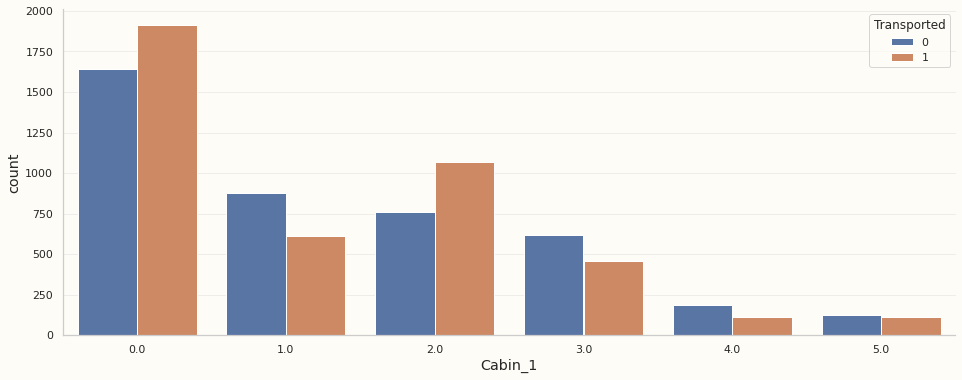

In [25]:
## Binning 'Cabin_1' based on the above graph
cabin_1_bins = np.array([0, 300, 600, 1150, 1500, 1700, 2000])
train['Cabin_1'] = pd.cut(train['Cabin_1'], bins=cabin_1_bins, labels=False, right=False)

## Distribution of 'Cabin_1' after Binning
sns.countplot(x='Cabin_1', data=train, hue='Transported')

<a id ="3.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.2 Dataset </center></h2>
[Back to the TOC](#toc)

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Data Processing</center></h2>

In [26]:
numerical_columns_0 = ['Age', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck']
numerical_columns_1 = ['Age', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_1']
categorical_columns_0 = ['PassengerId', 'HomePlanet', 'CryoSleep',
                       'Cabin', 'Destination', 'VIP', 'Name']
categorical_columns_1 = ['PassengerId', 'HomePlanet', 'CryoSleep',
                       'Cabin', 'Destination', 'VIP', 'Name',
                       'Cabin_0', 'Cabin_2']

In [27]:
## Before filling null values,　making the string 'nan' (transformed by astype(str) in preprocess_df() function) back to np.nan.
for column in ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Cabin_0', 'Cabin_2']:
    train[column] = train[column].map(lambda x: np.nan if x=='nan' else x)

## Filling null values with mode
train = train.fillna(train.mode().iloc[0])

for numerical in numerical_columns_1:
    train[numerical] = train[numerical].astype('int64')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   object
 2   CryoSleep     8693 non-null   object
 3   Destination   8693 non-null   object
 4   Age           8693 non-null   int64 
 5   VIP           8693 non-null   object
 6   RoomService   8693 non-null   int64 
 7   FoodCourt     8693 non-null   int64 
 8   ShoppingMall  8693 non-null   int64 
 9   Spa           8693 non-null   int64 
 10  VRDeck        8693 non-null   int64 
 11  Transported   8693 non-null   int64 
 12  Cabin_0       8693 non-null   object
 13  Cabin_1       8693 non-null   int64 
 14  Cabin_2       8693 non-null   object
dtypes: int64(8), object(7)
memory usage: 1018.8+ KB


In [28]:
## Test Data Processing
test = preprocess_df(test_df)
test = cabin_split(test)

test = clipping_quantile(test, quantile_values=train_quantile_values.loc[0.99])
test, _ = binning(test, numerical_columns_0, n_bins, thresholds=train_split_bins)
test['Cabin_1'] = pd.cut(test['Cabin_1'], bins=cabin_1_bins, labels=False, right=False)

for column in ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Cabin_0', 'Cabin_2']:
    test[column] = test[column].map(lambda x: np.nan if x=='nan' else x)

test = test.fillna(train.mode().iloc[0])

for numerical in numerical_columns_1:
    test[numerical] = test[numerical].astype('int64')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4277 non-null   object
 2   CryoSleep     4277 non-null   object
 3   Destination   4277 non-null   object
 4   Age           4277 non-null   int64 
 5   VIP           4277 non-null   object
 6   RoomService   4277 non-null   int64 
 7   FoodCourt     4277 non-null   int64 
 8   ShoppingMall  4277 non-null   int64 
 9   Spa           4277 non-null   int64 
 10  VRDeck        4277 non-null   int64 
 11  Cabin_0       4277 non-null   object
 12  Cabin_1       4277 non-null   int64 
 13  Cabin_2       4277 non-null   object
dtypes: int64(7), object(7)
memory usage: 467.9+ KB


<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Validation Split</center></h2>

In [29]:
## Split train samples for cross-validation
n_splits = exp_config['n_splits']
skf = StratifiedKFold(n_splits=n_splits)
train['k_folds'] = -1
for fold, (train_idx, valid_idx) in enumerate(
    skf.split(X=train, y=train['Transported'])
):
    train['k_folds'][valid_idx] = fold
    
## Check split samples
for i in range(n_splits):
    print(f"fold {i}: {len(train.query('k_folds==@i'))} samples")

fold 0: 1739 samples
fold 1: 1739 samples
fold 2: 1739 samples
fold 3: 1738 samples
fold 4: 1738 samples


In [30]:
## Hold-out validation
valid_fold = train.query(f'k_folds == 0').reset_index(drop=True)
train_fold = train.query(f'k_folds != 0').reset_index(drop=True)
print(len(train_fold), len(valid_fold))

6954 1739


<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Dataset and DataLoader</center></h2>

In [31]:
## After binning, all features are categorical.
numerical_columns = []
categorical_columns = ['Age', 'RoomService', 'FoodCourt',
                       'ShoppingMall', 'Spa', 'VRDeck',
                       'HomePlanet', 'CryoSleep',
                       'Destination', 'VIP', 
                       'Cabin_0', 'Cabin_1', 'Cabin_2']

## Making Lookup table of categorical featurs and target
## Using sklearn.preprocessing.OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='error',
                    dtype=np.int64)

encoded = oe.fit_transform(train_fold[categorical_columns].values)
#decoded = oe.inverse_transform(encoded)
train_fold[categorical_columns] = encoded

valid_fold[categorical_columns] = oe.transform(valid_fold[categorical_columns].values)
train[categorical_columns] = oe.transform(train[categorical_columns].values)
test[categorical_columns] = oe.transform(test[categorical_columns].values)

encoder_categories = oe.categories_
encoder_categories

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object),
 array(['Earth', 'Europa', 'Mars'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object),
 array([0, 1, 2, 3, 4, 5], dtype=object),
 array(['P', 'S'], dtype=object)]

In [32]:
## Dataset
class SpaceshipDataset(torch.utils.data.Dataset):
    def __init__(self, df, numerical_columns,
                 categorical_columns, target=None):
        self.df = df
        self.numerical_columns = numerical_columns
        self.categorical_columns = categorical_columns
        self.target = target
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        data = {}
        
        for nc in self.numerical_columns:
            x = torch.tensor(self.df[nc][index],
                             dtype=torch.float32)
            x = torch.unsqueeze(x, dim=0)
            data[nc] = x
            
        for cc in self.categorical_columns:
            x = torch.tensor(self.df[cc][index],
                             dtype=torch.int32)
            x = torch.unsqueeze(x, dim=0)
            data[cc] = x
        
        if self.target is not None:
            label = torch.tensor(self.df[self.target][index],
                                 dtype=torch.float32)
            label = torch.unsqueeze(label, dim=-1)
            return data, label
        else:
            return data

In [33]:
## Create Datasets
train_ds = SpaceshipDataset(
    train_fold,
    numerical_columns,
    categorical_columns,
    target='Transported'
)

val_ds = SpaceshipDataset(
    valid_fold,
    numerical_columns, 
    categorical_columns, 
    target='Transported'
)

test_ds = SpaceshipDataset(
    test,
    numerical_columns, 
    categorical_columns,
    target=None
)

## Operation Check
index = 0
print(train_ds.__getitem__(index))

({'Age': tensor([10], dtype=torch.int32), 'RoomService': tensor([5], dtype=torch.int32), 'FoodCourt': tensor([0], dtype=torch.int32), 'ShoppingMall': tensor([0], dtype=torch.int32), 'Spa': tensor([3], dtype=torch.int32), 'VRDeck': tensor([1], dtype=torch.int32), 'HomePlanet': tensor([0], dtype=torch.int32), 'CryoSleep': tensor([0], dtype=torch.int32), 'Destination': tensor([2], dtype=torch.int32), 'VIP': tensor([0], dtype=torch.int32), 'Cabin_0': tensor([6], dtype=torch.int32), 'Cabin_1': tensor([0], dtype=torch.int32), 'Cabin_2': tensor([1], dtype=torch.int32)}, tensor([0.]))


In [34]:
## Create DataLoaders
batch_size = exp_config['batch_size']

train_dl = torch.utils.data.DataLoader(
    train_ds,
    batch_size=batch_size,
    shuffle=True
)
val_dl = torch.utils.data.DataLoader(
    val_ds, 
    batch_size=batch_size, 
    shuffle=True
)
test_dl = torch.utils.data.DataLoader(
    test_ds, 
    batch_size=batch_size, 
    shuffle=False, 
    drop_last=False
)

dl_dict = {'train': train_dl, 'val': val_dl}

## Operation Check
sample_data, sample_label = next(iter(dl_dict['train']))
input_dtypes = {}
for key in sample_data:
    input_dtypes[key] = sample_data[key].dtype
    print(f'{key}, shape:{sample_data[key].shape}, dtype:{sample_data[key].dtype}')

print('Label shape: ', sample_label.shape)

Age, shape:torch.Size([512, 1]), dtype:torch.int32
RoomService, shape:torch.Size([512, 1]), dtype:torch.int32
FoodCourt, shape:torch.Size([512, 1]), dtype:torch.int32
ShoppingMall, shape:torch.Size([512, 1]), dtype:torch.int32
Spa, shape:torch.Size([512, 1]), dtype:torch.int32
VRDeck, shape:torch.Size([512, 1]), dtype:torch.int32
HomePlanet, shape:torch.Size([512, 1]), dtype:torch.int32
CryoSleep, shape:torch.Size([512, 1]), dtype:torch.int32
Destination, shape:torch.Size([512, 1]), dtype:torch.int32
VIP, shape:torch.Size([512, 1]), dtype:torch.int32
Cabin_0, shape:torch.Size([512, 1]), dtype:torch.int32
Cabin_1, shape:torch.Size([512, 1]), dtype:torch.int32
Cabin_2, shape:torch.Size([512, 1]), dtype:torch.int32
Label shape:  torch.Size([512, 1])


<a id ="4"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>4. Model</center></h1>

<a id ="4.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>4.1 Preprocessing Model</center></h2>
[Back to the TOC](#toc)

This Preprocessing model recieves input data from the dataset, and handles numerical and categorical features respectively. Numerical features are gathered in a tensor. Categorical features are transformed into uniform shaped tensors by learnable embedding layers.

In [35]:
class Preprocessor(nn.Module):
    def __init__(self, numerical_columns, categorical_columns, encoder_categories, emb_dim):
        super().__init__()
        self.numerical_columns = numerical_columns
        self.categorical_columns = categorical_columns
        self.encoder_categories = encoder_categories
        self.emb_dim = emb_dim
        self.embed_layers = nn.ModuleDict()
        
        for i, categorical in enumerate(categorical_columns):
            embedding = nn.Embedding(
                num_embeddings=len(self.encoder_categories[i]),
                embedding_dim=self.emb_dim,
            )
            self.embed_layers[categorical] = embedding
            
    def forward(self, x):
        x_nums = []
        for numerical in self.numerical_columns:
            x_num = torch.unsqueeze(x[numerical], dim=1)
            x_nums.append(x_num)
        if len(x_nums) > 0:
            x_nums = torch.cat(x_nums, dim=1)
        else:
            x_nums = torch.tensor(x_nums, dtype=torch.float32)
        
        x_cats = []
        for categorical in self.categorical_columns:
            x_cat = self.embed_layers[categorical](x[categorical])
            x_cats.append(x_cat)
        if len(x_cats) > 0:
            x_cats = torch.cat(x_cats, dim=1)
        else:
            x_cats = torch.tensor(x_cats, dtype=torch.float32)
        
        return x_nums, x_cats
    
## Operation Check
preprocessor = Preprocessor(
    numerical_columns,
    categorical_columns,
    encoder_categories,
    emb_dim=3)
x_nums, x_cats = preprocessor(sample_data)
x_nums.shape, x_cats.shape

(torch.Size([0]), torch.Size([512, 13, 3]))

<a id ="4.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>4.2 TabTransformer</center></h2>
[Back to the TOC](#toc)

The architecture of TabTransformer is as follows:

<img src="https://raw.githubusercontent.com/keras-team/keras-io/master/examples/structured_data/img/tabtransformer/tabtransformer.png" width="400"/>

The TabTransformer architecture comprises a column embedding layer, a stack of $N$ Transformer layers, and a multi-layer perceptron (MLP).

- **Column embedding layer:** All the categorical features ($x_1, \, x_2, \, \ldots, \, x_m $) are encoded into parametric embeddings, of same dimensions $d$. This means that each value in each categorical feature will have its own embedding vector. All embedding vectors are concatenated and constitute the input of Transformer layer, whose shape is $m \times d$.

- **Transformer layer:** The embedded categorical features are fed into a stack of Transformer blocks. Each Transformer block consists of a multi-head self-attention layer followed by a position-wise feed-forward layer. Parametric embeddings are transformed into contextual embeddings through the Transformer blocks.

 - **Self-attention layer:** A self-attention layer comprises three parametric matrices - Key, Query and Value. Each input embedding is projected on to these matrices, to generate their key ($K \in \mathbb{R}^{m \times k}$), query ($Q \in \mathbb{R}^{m \times k}$) and value ($V \in \mathbb{R}^{m \times v}$) vectors.
 
 $$
 \text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{k}})V
 $$
 
 - **Feed-forward layer:** Through two position-wise feed-forward layers, embeddings are expanded to four times its size and projected back to its original size. When using $ReLU$ activation, feed-forward network's formula is as follows:
 
 $$
 \text{FFN}(x) = \text{max}(0, \; x W_1 + b_1) W_2 + b_2
 $$

- **MLP:** The outputs of the last Transformer layer, which are contextualized embeddings of the categorical features, are concatenated along with the numerical input features to form a final feature vector. This vecter is inputted into an MLP to predict the target.

In [36]:
class MLPBlock(nn.Module):
    def __init__(self, n_features, hidden_units,
                 dropout_rates):
        super().__init__()
        self.mlp_layers = nn.Sequential()
        num_features = n_features
        for i, units in enumerate(hidden_units):
            self.mlp_layers.add_module(
                f'norm_{i}',
                nn.BatchNorm1d(num_features))
            self.mlp_layers.add_module(
                f'dense_{i}',
                nn.Linear(num_features, units))
            self.mlp_layers.add_module(
                f'act_{i}',
                nn.SELU())
            self.mlp_layers.add_module(
                f'dropout_{i}',
                nn.Dropout(dropout_rates[i]))
            num_features = units
            
    def forward(self, x):
        y = self.mlp_layers(x)
        return y

In [37]:
class TabTransformerBlock(nn.Module):
    def __init__(self, num_heads, emb_dim,
                 attn_dropout_rate, ff_dropout_rate):
        super().__init__()
        self.attn = nn.MultiheadAttention(
            emb_dim, num_heads,
            dropout=attn_dropout_rate,
            batch_first=True)
        self.norm_1 = nn.LayerNorm(emb_dim)
        self.norm_2 = nn.LayerNorm(emb_dim)
        self.feedforward = nn.Sequential(
            nn.Linear(emb_dim, emb_dim*4),
            nn.GELU(),
            nn.Dropout(ff_dropout_rate), 
            nn.Linear(emb_dim*4, emb_dim))
        
    def forward(self, x_cat):
        attn_output, attn_output_weights = self.attn(x_cat, x_cat, x_cat)
        x_skip_1 = x_cat + attn_output
        x_skip_1 = self.norm_1(x_skip_1)
        feedforward_output = self.feedforward(x_skip_1)
        x_skip_2 = x_skip_1 + feedforward_output
        x_skip_2 = self.norm_2(x_skip_2)
        return x_skip_2

In [38]:
class OriginalTabTransformer(nn.Module): 
    def __init__(self, numerical_columns, categorical_columns,
                 num_transformer_blocks, num_heads, emb_dim,
                 attn_dropout_rates, ff_dropout_rates,
                 mlp_dropout_rates,
                 mlp_hidden_units_factors,
                 ):
        super().__init__()
        self.transformers = nn.Sequential()
        for i in range(num_transformer_blocks):
            self.transformers.add_module(
                f'transformer_{i}', 
                TabTransformerBlock(
                    num_heads,
                    emb_dim,
                    attn_dropout_rates[i],
                    ff_dropout_rates[i]))
        
        self.flatten = nn.Flatten()
        self.num_norm = nn.LayerNorm(len(numerical_columns))
        
        self.n_features = (len(categorical_columns) * emb_dim) + len(numerical_columns)
        mlp_hidden_units = [int(factor * self.n_features) \
                            for factor in mlp_hidden_units_factors]
        self.mlp = MLPBlock(
            self.n_features, mlp_hidden_units,
            mlp_dropout_rates)
        
        self.final_dense = nn.Linear(mlp_hidden_units[-1], 1)
        self.final_sigmoid = nn.Sigmoid()
        
    def forward(self, x_nums, x_cats):
        contextualized_x_cats = self.transformers(x_cats)
        contextualized_x_cats = self.flatten(contextualized_x_cats)
        
        if x_nums.shape[-1] > 0:
            x_nums = self.num_norm(x_nums)
            features = torch.cat((x_nums, contextualized_x_cats), -1)
        else:
            features = contextualized_x_cats
            
        mlp_output = self.mlp(features)
        model_output = self.final_dense(mlp_output)
        output = self.final_sigmoid(model_output)
        return output

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Modifications</center></h2>

I made following modifications in order for transformer layer to be able to handle not only categorical features but also continuous (numerical) features.

- When I have one or more continuous values, i.e. $n_{cont} \geq 1$:

 - After normalization, continuous values $X_{cont} \in \mathbb{R}^{1 \times n_{cont}}$ are transformed into a vector $V_{cont} \in \mathbb{R}^{1 \times d}$ by linear projections and activation function as follows:
 
   $$
   H_{cont} = \text{GELU} ( X_{cont} W_{cont, 1} + b_{cont, 1})
   $$
   
   $$
   V_{cont} = H_{cont} W_{cont, 2} + b_{cont, 2}
   $$
 
 - All the categorical embeddings $X_{cat} \in \mathbb{R}^{m \times d}$ is concatenated with the aforementioned vector $V_{cont} \in \mathbb{R}^{1 \times d}$ and constitute the input of transformer layer $X \in \mathbb{R}^{(m+1) \times d}$.
 
- Let $Y \in \mathbb{R}^{n_{out} \times d}$ be the output of transformer layer. Thus, the sequence dimension of $Y$, $n_{out}$, is $(m + 1)$ or $m$ when $n_{cont} \geq 1$ or $n_{cont} = 0$, respectively.

- Then, $Y$ is fed into flatten layer and final MLP block with sigmoid activation function successively to predict the target's probability.

In [39]:
class ModifiedTabTransformer(nn.Module): 
    def __init__(self, numerical_columns, categorical_columns,
                 num_transformer_blocks, num_heads, emb_dim,
                 attn_dropout_rates, ff_dropout_rates,
                 mlp_dropout_rates,
                 mlp_hidden_units_factors,
                 ):
        super().__init__()
        
        if len(numerical_columns) > 0:
            self.num_norm = nn.LayerNorm(len(numerical_columns))
            self.num_proj = nn.Sequential()
            self.num_proj.add_module(
                f'expansion',
                nn.Linear(
                    len(numerical_columns), 
                    len(numerical_columns)*num_proj_factor))
            self.num_proj.add_module(
                f'activation', 
                nn.GELU())
            self.num_proj.add_module(
                f'squeeze', 
                nn.Linear(
                    len(numerical_columns)*num_proj_factor, 
                    emb_dim))
            seq_len = len(categorical_columns) + 1
        else:
            seq_len = len(categorical_columns)
            
        self.transformers = nn.Sequential()
        for i in range(num_transformer_blocks):
            self.transformers.add_module(
                f'transformer_{i}', 
                TabTransformerBlock(
                    num_heads,
                    emb_dim,
                    attn_dropout_rates[i],
                    ff_dropout_rates[i]))
        
        self.flatten = nn.Flatten()
        
        n_features = seq_len * emb_dim
        self.mlp = None
        if len(mlp_hidden_units_factors) > 0:
            mlp_hidden_units = [int(factor * n_features)\
                                for factor in mlp_hidden_units_factors]
            self.mlp = MLPBlock(
                n_features,
                mlp_hidden_units,
                mlp_dropout_rates)
            self.final_dense = nn.Linear(mlp_hidden_units[-1], 1)
        else:
            self.final_dense = nn.Linear(n_features, 1)
            
        self.final_sigmoid = nn.Sigmoid()
        
    def forward(self, x_nums, x_cats):
        if x_nums.shape[-1] > 0:
            x_nums = self.num_norm(x_nums)
            x_nums = self.num_proj(x_nums)
            x_nums = torch.unsqueeze(x_nums, dim=-2)
            features = torch.cat((x_nums, x_cats), dim=-2)
        else:
            features = x_cats
        
        contextualized_features = self.transformers(features)
        contextualized_features = self.flatten(contextualized_features)
        
        if self.mlp is not None:
            mlp_output = self.mlp(contextualized_features)
            model_output = self.final_dense(mlp_output)
        else:
            model_output = self.final_dense(contextualized_features)
        output = self.final_sigmoid(model_output)
        return output

In [40]:
## TabTransformer Model Check

## Settings for TabTransformer
emb_dim = model_config['cat_embedding_dim']
num_transformer_blocks = model_config['num_transformer_blocks']
num_heads = model_config['num_heads']
attn_dropout_rates = model_config['tf_dropout_rates']
ff_dropout_rates = model_config['ff_dropout_rates']
mlp_dropout_rates = model_config['mlp_dropout_rates']
mlp_hidden_units_factors = model_config['mlp_hidden_units_factors']

## Building Models
preprocessor = Preprocessor(
    numerical_columns, categorical_columns,
    encoder_categories, emb_dim)

model = ModifiedTabTransformer(
    numerical_columns, categorical_columns,
    num_transformer_blocks, num_heads, emb_dim,
    attn_dropout_rates, ff_dropout_rates,
    mlp_dropout_rates, mlp_hidden_units_factors)

## Operation, Parameters and Model Structure Check
x_nums, x_cats = preprocessor(sample_data)
y = model(x_nums, x_cats)
print('Numerical Input shape: ', x_nums.shape)
print('Categorical Input shape: ', x_cats.shape)
print('Output shape: ', y.shape)

print('# of Preprocessor parameters: ',
      sum(p.numel() for p in preprocessor.parameters() if p.requires_grad))
print('# of TabTransformer parameters: ',
      sum(p.numel() for p in model.parameters() if p.requires_grad))

model

Numerical Input shape:  torch.Size([0])
Categorical Input shape:  torch.Size([512, 13, 12])
Output shape:  torch.Size([512, 1])
# of Preprocessor parameters:  1104
# of TabTransformer parameters:  32497


ModifiedTabTransformer(
  (transformers): Sequential(
    (transformer_0): TabTransformerBlock(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
      )
      (norm_1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
      (norm_2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
      (feedforward): Sequential(
        (0): Linear(in_features=12, out_features=48, bias=True)
        (1): GELU()
        (2): Dropout(p=0.0, inplace=False)
        (3): Linear(in_features=48, out_features=12, bias=True)
      )
    )
    (transformer_1): TabTransformerBlock(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
      )
      (norm_1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
      (norm_2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
      (feedforward): Sequential(
        (0): Linear(in_features=12, out

<a id ="4.3"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>4.3 gMLP Model</center></h2>
[Back to the TOC](#toc)

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>gMLP Block</center></h2>

gMLP block simply consists of channel projections and spatial projections. The authors of original gMLP paper were inspired by inverted bottlenecks which define as a spatial depthwise convolution, and built out of basic MLP layers with *'Spatial Gating Unit'* as follows:

<img src="https://production-media.paperswithcode.com/methods/641e1c00-a87b-40ce-a0ab-af50ac6aa318.png" width="700"/>

gMLP consists of a stack of $L$ blocks with identical size and structure. $X \in \mathbb{R}^{n \times d}$ is the input with the number of features $n$ and embedding dimension $d$, which are referred to as "spatial axis" and "channel axis" respectively in the figure above. In each block, input $X$ is transformed into output $Y$ by the following fomulations (shortcuts, normalizations and biases are omitted for brevity):

$$
Z = \sigma(XU), \qquad \tilde{Z} = s(Z), \qquad Y = \tilde{Z}V
$$

where $\sigma$ is an activation function such as $\text{GeLU}$ or $\text{ReLU}$. $U$ and $V$ define linear projections along the embedding dimension. $s(\cdot)$ represents SGU (Spatial Gating Unit) which is a key ingredient of gMLP block and processes $Z$ with cross-feature communication.

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Spatial Gating Unit (SGU)</center></h2>

SGU captures the interactions across features with a contraction operation over the 'spatial' demension $n$, i.e. number of features, not embedding demension $d$. For this purpose, the simplistic option would be a linear projection:

$$
f_{W,b}(Z) = WZ + b
$$

where $W \in \mathbb{R}^{n \times n}$ is the spatial projection matrix, and $b$ refers feature-specific biases. Unlike self-attention where $W$ is dynamically generated from the context of input $Z$, $W$ here in SGU is statically parameterized and independent from the input representations. Then, $f_{W,b}(Z)$ is used as a linear gating of input $Z$:

$$
s(Z) = Z \odot f_{W,b}(Z)
$$

where $\odot$ denotes element-wise multiplication. Alos, the authors of original gMLP paper found it effective to split $Z$ into two independent parts $(Z_1, Z_2)$ along the embedding dimension for the gating function and for the multiplicative bypass:

$$
s(Z) = Z_1 \odot f_{W,b}(Z_2)
$$

Please note that $W$ is initialized as near-zero values and $b$ as ones, meaning that $f_{W,b}(Z) \approx 1$ and therefore $s(Z) \approx Z$, i.e. identity mapping, at the beginning of training. This initialization ensures each gMLP block behaves like a regular feed-forward network at the early stage of training, where each feature is processed independently, and only gradually injects cross-feature information during the course of learning.

In [41]:
class SGUBlock(nn.Module):
    def __init__(self, seq_len, emb_dim,
                 split=True, init_eps=1e-3):
        super().__init__()
        self.split = split
        if self.split:
            self.norm = nn.LayerNorm(emb_dim//2)
        else:
            self.norm = nn.LayerNorm(emb_dim)
        self.W = nn.Parameter(torch.zeros(seq_len, seq_len))
        nn.init.uniform_(self.W, -init_eps, init_eps)
        if self.split:
            self.b = nn.Parameter(torch.ones((seq_len, emb_dim//2)))
        else:
            self.b = nn.Parameter(torch.ones((seq_len, emb_dim)))
        
    def forward(self, Z):
        if self.split:
            if Z.shape[-1] % 2 == 1:
                chunk_dim = Z.shape[-1] // 2
                Z1, Z2, _ = Z.split(chunk_dim, dim=-1)
            else:
                Z1, Z2 = torch.chunk(Z, 2, dim=-1)
            f_Z = self.norm(Z2)
        else:
            Z1 = Z
            f_Z = self.norm(Z)
        f_Z = torch.permute(f_Z, (0, 2, 1))
        f_Z = torch.matmul(f_Z, self.W)
        f_Z = torch.permute(f_Z, (0, 2, 1))
        f_Z = f_Z + self.b
        output = torch.mul(f_Z, Z1)
        return output

In [42]:
class GMLPBlock(nn.Module):
    def __init__(self, seq_len, emb_dim,
                 num_blocks=2, split=True, 
                 proj_factor=4,
                 init_eps=1e-3):
        super().__init__()
        self.num_blocks = num_blocks
        self.gmlp = nn.ModuleList()
        for i in range(num_blocks):
            gmlp_block = nn.Sequential()
            gmlp_block.add_module(
                f'norm_{i}',
                nn.LayerNorm(emb_dim))
            gmlp_block.add_module(
                f'linear_{i}_1',
                nn.Linear(emb_dim,
                          emb_dim * proj_factor))
            gmlp_block.add_module(
                f'activation_{i}',
                nn.ReLU())
            gmlp_block.add_module(
                f'sgu_{i}',
                SGUBlock(seq_len,
                         emb_dim * proj_factor,
                         split))
            
            if split:
                tmp_dim = emb_dim * proj_factor // 2
            else:
                tmp_dim = emb_dim * proj_factor 
            
            gmlp_block.add_module(
                f'linear_{i}_2',
                nn.Linear(tmp_dim, emb_dim))
            self.gmlp.append(gmlp_block)
            
    def forward(self, x):
        for i in range(self.num_blocks):
            shortcut = x
            x = self.gmlp[i](x)
            x = x + shortcut
        return x

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Modifications</center></h2>

The whole gMLP model has a similar structure to modified-TabTransformer and some differences. Ofcourse, the most important point is replacement of Transformer layer by gMLP blocks. Besides, you can also customize the MLP block just before the final linear layer. The implementation is as follows:

In [43]:
class GMLP(nn.Module): 
    def __init__(self, numerical_columns, categorical_columns,
                 emb_dim, num_proj_factor=4,
                 gmlp_num_blocks=4, gmlp_split=True,
                 gmlp_proj_factor=4, 
                 gmlp_dropout=[0.], mlp_factors=[],
                 gmlp_init_eps=1e-3, feature_pooling=False,):
        super().__init__()
        
        if len(numerical_columns) > 0:
            self.num_norm = nn.LayerNorm(len(numerical_columns))
            self.num_proj = nn.Sequential()
            self.num_proj.add_module(
                f'expansion',
                nn.Linear(
                    len(numerical_columns), 
                    len(numerical_columns)*num_proj_factor))
            self.num_proj.add_module(
                f'activation', 
                nn.GELU())
            self.num_proj.add_module(
                f'squeeze', 
                nn.Linear(
                    len(numerical_columns)*num_proj_factor, 
                    emb_dim))
            seq_len = len(categorical_columns) + 1
        else:
            seq_len = len(categorical_columns)
        self.gmlp = GMLPBlock(
            seq_len, emb_dim,
            num_blocks=gmlp_num_blocks,
            split=gmlp_split, 
            proj_factor=gmlp_proj_factor,
            init_eps=gmlp_init_eps)
        
        self.feature_pooling = feature_pooling
        if feature_pooling:
            mlp_input_dim = emb_dim
        else:
            mlp_input_dim = seq_len * emb_dim
            self.flatten = nn.Flatten()
            
        self.mlp_units = None
        if len(mlp_factors) > 0:
            self.mlp_units = [factor * mlp_input_dim\
                              for factor in mlp_factors]
            
        if self.mlp_units is not None:
            self.mlp = nn.Sequential()
            input_dim = mlp_input_dim
            for i in range(len(self.mlp_units)):
                output_dim = self.mlp_units[i]
                self.mlp.add_module(
                    f'norm_{i}',
                    nn.BatchNorm1d(input_dim))
                self.mlp.add_module(
                    f'dense_{i}',
                    nn.Linear(input_dim, output_dim))
                self.mlp.add_module(
                    f'act_{i}',
                    nn.SELU())
                self.mlp.add_module(
                    f'dropout_{i}',
                    nn.Dropout(gmlp_dropout[i]))
                input_dim = output_dim
            self.final_dense = nn.Linear(
                input_dim, 1)
        else:
            self.final_dense = nn.Linear(
                mlp_input_dim, 1)
            
        self.final_sigmoid = nn.Sigmoid()
        
        
    def forward(self, x_nums, x_cats):
        if x_nums.shape[-1] > 0:
            x_nums = self.num_norm(x_nums)
            x_nums = self.num_proj(x_nums)
            x_nums = torch.unsqueeze(x_nums, dim=-2)
            features = torch.cat((x_nums, x_cats), dim=-2)
        else:
            features = x_cats
        gmlp_output = self.gmlp(features)
        
        if self.feature_pooling:
            gmlp_output = torch.mean(gmlp_output, dim=-2)
        else:
            gmlp_output = self.flatten(gmlp_output)
        
        if self.mlp_units is not None:
            gmlp_output = self.mlp(gmlp_output)
    
        model_output = self.final_dense(gmlp_output)
        output = self.final_sigmoid(model_output)
        return output

In [44]:
## gMLP Model Check

## Settings for gMLP Model
emb_dim = model_config['cat_embedding_dim']
num_proj_factor = model_config['num_proj_factor']
gmlp_num_blocks = model_config['gmlp_num_blocks']
gmlp_split = model_config['gmlp_split']
gmlp_proj_factor = model_config['gmlp_proj_factor']
gmlp_dropout = model_config['gmlp_dropout']
mlp_factors = model_config['mlp_factors']
gmlp_init_eps = model_config['gmlp_init_eps']
feature_pooling = model_config['feature_pooling']

## Building Models
preprocessor = Preprocessor(
    numerical_columns, categorical_columns,
    encoder_categories, emb_dim)

model = GMLP(
    numerical_columns, categorical_columns,
    emb_dim, num_proj_factor=num_proj_factor,
    gmlp_num_blocks=gmlp_num_blocks,
    gmlp_split=gmlp_split,
    gmlp_proj_factor=gmlp_proj_factor,
    gmlp_dropout=gmlp_dropout,
    mlp_factors=mlp_factors,
    gmlp_init_eps=gmlp_init_eps,
    feature_pooling=feature_pooling)

## Operation, Parameters and Model Structure Check
x_nums, x_cats = preprocessor(sample_data)
y = model(x_nums, x_cats)
print('Numerical Input shape: ', x_nums.shape)
print('Categorical Input shape: ', x_cats.shape)
print('Output shape: ', y.shape)

print('# of Preprocessor parameters: ',\
      sum(p.numel() for p in preprocessor.parameters() if p.requires_grad))
print('# of gMLP parameters: ',\
      sum(p.numel() for p in model.parameters() if p.requires_grad))

model

Numerical Input shape:  torch.Size([0])
Categorical Input shape:  torch.Size([512, 13, 12])
Output shape:  torch.Size([512, 1])
# of Preprocessor parameters:  1104
# of gMLP parameters:  34927


GMLP(
  (gmlp): GMLPBlock(
    (gmlp): ModuleList(
      (0): Sequential(
        (norm_0): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (linear_0_1): Linear(in_features=12, out_features=36, bias=True)
        (activation_0): ReLU()
        (sgu_0): SGUBlock(
          (norm): LayerNorm((18,), eps=1e-05, elementwise_affine=True)
        )
        (linear_0_2): Linear(in_features=18, out_features=12, bias=True)
      )
      (1): Sequential(
        (norm_1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (linear_1_1): Linear(in_features=12, out_features=36, bias=True)
        (activation_1): ReLU()
        (sgu_1): SGUBlock(
          (norm): LayerNorm((18,), eps=1e-05, elementwise_affine=True)
        )
        (linear_1_2): Linear(in_features=18, out_features=12, bias=True)
      )
      (2): Sequential(
        (norm_2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
        (linear_2_1): Linear(in_features=12, out_features=36, bias=True)
        

<a id ="5"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>5. Training</center></h1>
[Back to the TOC](#toc)

In [45]:
## Building Models
preprocessor = Preprocessor(
    numerical_columns, categorical_columns,
    encoder_categories, emb_dim)

if model_config['model'] == 'tabtransformer':
    model = ModifiedTabTransformer(
        numerical_columns, categorical_columns,
        num_transformer_blocks, num_heads, emb_dim,
        attn_dropout_rates, ff_dropout_rates,
        mlp_dropout_rates, mlp_hidden_units_factors)
    
elif model_config['model'] == 'gmlp':
    model = GMLP(
        numerical_columns, categorical_columns,
        emb_dim, num_proj_factor=num_proj_factor,
        gmlp_num_blocks=gmlp_num_blocks,
        gmlp_split=gmlp_split,
        gmlp_proj_factor=gmlp_proj_factor,
        gmlp_dropout=gmlp_dropout,
        mlp_factors=mlp_factors,
        gmlp_init_eps=gmlp_init_eps,
        feature_pooling=feature_pooling)

print(f"model: {model_config['model']}")

model: gmlp


In [46]:
## Loss Function
criterion = nn.BCELoss()

## Optimizer and Learning Rate Scheduler
epochs = exp_config['train_epochs']
batch_size = exp_config['batch_size']
steps_per_epoch = len(train_fold) // batch_size

learning_rate = exp_config['learning_rate']
weight_decay = exp_config['weight_decay']
params = list(preprocessor.parameters()) + list(model.parameters())

optimizer = torch.optim.AdamW(
    params=params,
    lr=learning_rate,
    weight_decay=weight_decay)

lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer=optimizer,
    T_max=epochs*steps_per_epoch)

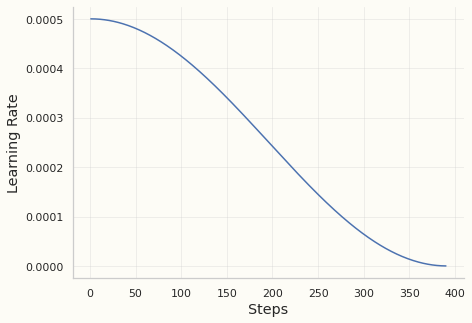

In [47]:
## Displaying Learning Rate
def lr_plot(lr_scheduler, steps):
    lrs = []
    for _ in range(steps):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        lr_scheduler.step()
    xs = [i+1 for i in range(steps)]
    plt.figure(figsize=(7,5))
    ax = sns.lineplot(xs, lrs)
    ax.set_xlabel('Steps')
    ax.set_ylabel('Learning Rate')
    
lr_plot(lr_scheduler, epochs*steps_per_epoch)

## Create New Optimizer and Lr_scheduler
optimizer = torch.optim.AdamW(
    params=params,
    lr=learning_rate,
    weight_decay=weight_decay)

lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer=optimizer,
    T_max=epochs*steps_per_epoch)

In [48]:
## Model Save & Load
cpt_filepath = exp_config['checkpoint_filepath']

## Function for Saving Model
def model_save(model, preprocessor,
               optimizer, scheduler, path):
    directory = path.split('/')[:-1]
    directory = '/'.join(directory)
    os.makedirs(directory, exist_ok=True)
    
    ## When you use multi GPUs with DataParallel
    model_to_save = model.module if hasattr(model, "module") else model
    
    checkpoint = {
        "model": model_to_save.state_dict(),
        "preprocessor": preprocessor.state_dict(),
        "optimizer": optimizer.state_dict(),
        "scheduler": scheduler.state_dict(),
        "random": random.getstate(),
        "np_random": np.random.get_state(),
        "torch": torch.get_rng_state(),
        "torch_random": torch.random.get_rng_state(),
    }
    
    if torch.cuda.is_available():
        cuda_random_state = {
            "cuda_random": torch.cuda.get_rng_state(),
            "cuda_random_all": torch.cuda.get_rng_state_all(),
        }
        checkpoint.update(cuda_random_state)
        
    torch.save(checkpoint, path)
    print('Model saved!')

## Function for Loading Model
def model_load(model, preprocessor,
               optimizer, scheduler, path):
    checkpoint = torch.load(path) 
    
    ## When you use multi GPUs with DataParallel
    if hasattr(model, "module"):  
        model.module.load_state_dict(checkpoint["model"])
    else:
        model.load_state_dict(checkpoint["model"])
        
    preprocessor.load_state_dict(checkpoint["preprocessor"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    scheduler.load_state_dict(checkpoint["scheduler"])
    random.setstate(checkpoint["random"])
    np.random.set_state(checkpoint["np_random"])
    torch.set_rng_state(checkpoint["torch"])
    torch.random.set_rng_state(checkpoint["torch_random"])
    
    if torch.cuda.is_available():
        torch.cuda.set_rng_state(checkpoint["cuda_random"])
        torch.cuda.torch.cuda.set_rng_state_all(checkpoint["cuda_random_all"])
        
    print('Model loaded!')

In [49]:
## Function for the Model Training
def train_model(model, preprocessor, dl_dict,
                criterion, optimizer, lr_scheduler,
                num_epochs, cpt_filepath=None,
                finalize=False):
    ## Checking usability of GUP
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(f'device: {device}')
    print('-------Start Training-------')
    model.to(device)
    ## We use preprocessor on CPU
    
    ## training and validation loop
    if finalize:
        phases = ['train']
    else:
        phases = ['train', 'val']
        
    losses = {phase: [] for phase in phases}
    best_val_loss = 100.
    best_epoch = 1
    for epoch in range(num_epochs):
        for phase in phases:
            if phase == 'train':
                preprocessor.train()
                model.train()
            else:
                preprocessor.eval()
                model.eval()
                
            epoch_loss = 0.0
            epoch_corrects = 0
            
            for data, labels in tqdm(dl_dict[phase]):
                x_nums, x_cats = preprocessor(data)
                
                x_nums = x_nums.to(device)
                labels = labels.to(device)
                
                ## Optimizer Initialization
                optimizer.zero_grad()
                
                ## Forward Processing
                with torch.set_grad_enabled(phase=='train'):
                    outputs = model(x_nums, x_cats)
                    loss = criterion(outputs, labels)
                    preds = torch.where(outputs>0.5, 1., 0.)
                    
                    ## Backward Processing and Optimization
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        lr_scheduler.step()
                        
                    epoch_loss += loss.item() * x_cats.size(0)
                    epoch_corrects += torch.sum(preds == labels)
            
            epoch_loss = epoch_loss / len(dl_dict[phase].dataset)
            losses[phase].append(epoch_loss)
            epoch_acc = epoch_corrects / len(dl_dict[phase].dataset)
            
            ## Saving the best Model
            if phase == 'val':
                if cpt_filepath is not None:
                    if epoch_loss < best_val_loss:
                        best_epoch = epoch + 1
                        best_val_loss = epoch_loss
                        model_save(
                            model, preprocessor,
                            optimizer, lr_scheduler,
                            cpt_filepath)
            
            ## Displaying results
            print('Epoch {}/{} | {:^5} |  Loss: {:.4f} Acc: {:.4f}'.\
                  format(epoch+1, num_epochs, phase, epoch_loss, epoch_acc))
    
    if finalize:
    ## Saving finalized Model
        if cpt_filepath is not None:
            model_save(
                model, preprocessor, 
                optimizer, lr_scheduler,
                cpt_filepath)
        
    return model, preprocessor, losses, best_epoch

In [50]:
## Training
model, preprocessor, losses, best_epoch = train_model(
    model,
    preprocessor,
    dl_dict,
    criterion,
    optimizer,
    lr_scheduler,
    epochs,
    cpt_filepath,
)

## Load the Best Model
model_load(model, preprocessor, optimizer, lr_scheduler, cpt_filepath)

device: cpu
-------Start Training-------


100%|██████████| 14/14 [00:05<00:00,  2.49it/s]


Epoch 1/30 | train |  Loss: 0.7233 Acc: 0.5621


100%|██████████| 4/4 [00:00<00:00,  5.95it/s]


Model saved!
Epoch 1/30 |  val  |  Loss: 0.5787 Acc: 0.7067


100%|██████████| 14/14 [00:05<00:00,  2.48it/s]


Epoch 2/30 | train |  Loss: 0.5361 Acc: 0.7325


100%|██████████| 4/4 [00:00<00:00,  5.79it/s]


Model saved!
Epoch 2/30 |  val  |  Loss: 0.5469 Acc: 0.7361


100%|██████████| 14/14 [00:05<00:00,  2.55it/s]


Epoch 3/30 | train |  Loss: 0.5070 Acc: 0.7541


100%|██████████| 4/4 [00:00<00:00,  6.06it/s]


Epoch 3/30 |  val  |  Loss: 0.5518 Acc: 0.7407


100%|██████████| 14/14 [00:05<00:00,  2.43it/s]


Epoch 4/30 | train |  Loss: 0.4918 Acc: 0.7653


100%|██████████| 4/4 [00:00<00:00,  5.99it/s]


Model saved!
Epoch 4/30 |  val  |  Loss: 0.5332 Acc: 0.7458


100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


Epoch 5/30 | train |  Loss: 0.4803 Acc: 0.7696


100%|██████████| 4/4 [00:00<00:00,  5.86it/s]


Model saved!
Epoch 5/30 |  val  |  Loss: 0.5198 Acc: 0.7504


100%|██████████| 14/14 [00:05<00:00,  2.48it/s]


Epoch 6/30 | train |  Loss: 0.4702 Acc: 0.7778


100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


Model saved!
Epoch 6/30 |  val  |  Loss: 0.5107 Acc: 0.7573


100%|██████████| 14/14 [00:05<00:00,  2.53it/s]


Epoch 7/30 | train |  Loss: 0.4624 Acc: 0.7807


100%|██████████| 4/4 [00:00<00:00,  4.37it/s]


Model saved!
Epoch 7/30 |  val  |  Loss: 0.5010 Acc: 0.7665


100%|██████████| 14/14 [00:05<00:00,  2.68it/s]


Epoch 8/30 | train |  Loss: 0.4537 Acc: 0.7877


100%|██████████| 4/4 [00:00<00:00,  4.40it/s]


Model saved!
Epoch 8/30 |  val  |  Loss: 0.4950 Acc: 0.7660


100%|██████████| 14/14 [00:05<00:00,  2.59it/s]


Epoch 9/30 | train |  Loss: 0.4473 Acc: 0.7892


100%|██████████| 4/4 [00:00<00:00,  6.11it/s]


Model saved!
Epoch 9/30 |  val  |  Loss: 0.4896 Acc: 0.7642


100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


Epoch 10/30 | train |  Loss: 0.4408 Acc: 0.7959


100%|██████████| 4/4 [00:00<00:00,  6.00it/s]


Model saved!
Epoch 10/30 |  val  |  Loss: 0.4825 Acc: 0.7717


100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


Epoch 11/30 | train |  Loss: 0.4330 Acc: 0.7993


100%|██████████| 4/4 [00:00<00:00,  6.03it/s]


Model saved!
Epoch 11/30 |  val  |  Loss: 0.4774 Acc: 0.7729


100%|██████████| 14/14 [00:05<00:00,  2.59it/s]


Epoch 12/30 | train |  Loss: 0.4276 Acc: 0.8014


100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


Model saved!
Epoch 12/30 |  val  |  Loss: 0.4721 Acc: 0.7717


100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


Epoch 13/30 | train |  Loss: 0.4224 Acc: 0.8004


100%|██████████| 4/4 [00:00<00:00,  6.03it/s]


Epoch 13/30 |  val  |  Loss: 0.4723 Acc: 0.7683


100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


Epoch 14/30 | train |  Loss: 0.4172 Acc: 0.8074


100%|██████████| 4/4 [00:00<00:00,  6.17it/s]


Model saved!
Epoch 14/30 |  val  |  Loss: 0.4643 Acc: 0.7769


100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


Epoch 15/30 | train |  Loss: 0.4117 Acc: 0.8067


100%|██████████| 4/4 [00:00<00:00,  6.17it/s]


Model saved!
Epoch 15/30 |  val  |  Loss: 0.4605 Acc: 0.7763


100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


Epoch 16/30 | train |  Loss: 0.4080 Acc: 0.8066


100%|██████████| 4/4 [00:00<00:00,  4.41it/s]


Model saved!
Epoch 16/30 |  val  |  Loss: 0.4584 Acc: 0.7734


100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


Epoch 17/30 | train |  Loss: 0.4051 Acc: 0.8085


100%|██████████| 4/4 [00:00<00:00,  5.51it/s]


Model saved!
Epoch 17/30 |  val  |  Loss: 0.4569 Acc: 0.7729


100%|██████████| 14/14 [00:05<00:00,  2.59it/s]


Epoch 18/30 | train |  Loss: 0.4024 Acc: 0.8099


100%|██████████| 4/4 [00:00<00:00,  6.11it/s]


Epoch 18/30 |  val  |  Loss: 0.4571 Acc: 0.7729


100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


Epoch 19/30 | train |  Loss: 0.4005 Acc: 0.8083


100%|██████████| 4/4 [00:00<00:00,  5.99it/s]


Model saved!
Epoch 19/30 |  val  |  Loss: 0.4535 Acc: 0.7734


100%|██████████| 14/14 [00:05<00:00,  2.54it/s]


Epoch 20/30 | train |  Loss: 0.3990 Acc: 0.8106


100%|██████████| 4/4 [00:00<00:00,  4.39it/s]


Epoch 20/30 |  val  |  Loss: 0.4541 Acc: 0.7734


100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


Epoch 21/30 | train |  Loss: 0.3974 Acc: 0.8112


100%|██████████| 4/4 [00:00<00:00,  6.10it/s]


Epoch 21/30 |  val  |  Loss: 0.4537 Acc: 0.7729


100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


Epoch 22/30 | train |  Loss: 0.3963 Acc: 0.8113


100%|██████████| 4/4 [00:00<00:00,  5.81it/s]


Model saved!
Epoch 22/30 |  val  |  Loss: 0.4529 Acc: 0.7746


100%|██████████| 14/14 [00:05<00:00,  2.53it/s]


Epoch 23/30 | train |  Loss: 0.3956 Acc: 0.8122


100%|██████████| 4/4 [00:00<00:00,  5.87it/s]


Model saved!
Epoch 23/30 |  val  |  Loss: 0.4527 Acc: 0.7752


100%|██████████| 14/14 [00:05<00:00,  2.52it/s]


Epoch 24/30 | train |  Loss: 0.3950 Acc: 0.8112


100%|██████████| 4/4 [00:00<00:00,  6.08it/s]


Model saved!
Epoch 24/30 |  val  |  Loss: 0.4526 Acc: 0.7734


100%|██████████| 14/14 [00:05<00:00,  2.60it/s]


Epoch 25/30 | train |  Loss: 0.3946 Acc: 0.8115


100%|██████████| 4/4 [00:00<00:00,  4.36it/s]


Epoch 25/30 |  val  |  Loss: 0.4527 Acc: 0.7671


100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


Epoch 26/30 | train |  Loss: 0.3945 Acc: 0.8113


100%|██████████| 4/4 [00:00<00:00,  5.91it/s]


Model saved!
Epoch 26/30 |  val  |  Loss: 0.4521 Acc: 0.7757


100%|██████████| 14/14 [00:05<00:00,  2.45it/s]


Epoch 27/30 | train |  Loss: 0.3943 Acc: 0.8119


100%|██████████| 4/4 [00:00<00:00,  5.91it/s]


Epoch 27/30 |  val  |  Loss: 0.4522 Acc: 0.7746


100%|██████████| 14/14 [00:05<00:00,  2.53it/s]


Epoch 28/30 | train |  Loss: 0.3943 Acc: 0.8115


100%|██████████| 4/4 [00:00<00:00,  6.05it/s]


Epoch 28/30 |  val  |  Loss: 0.4522 Acc: 0.7746


100%|██████████| 14/14 [00:05<00:00,  2.57it/s]


Epoch 29/30 | train |  Loss: 0.3943 Acc: 0.8115


100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


Epoch 29/30 |  val  |  Loss: 0.4522 Acc: 0.7746


100%|██████████| 14/14 [00:05<00:00,  2.73it/s]


Epoch 30/30 | train |  Loss: 0.3943 Acc: 0.8113


100%|██████████| 4/4 [00:00<00:00,  4.32it/s]


Epoch 30/30 |  val  |  Loss: 0.4523 Acc: 0.7746
Model loaded!


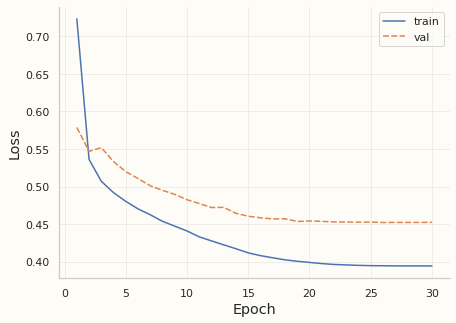

In [51]:
## Function for Plotting Losses
def plot_losses(losses, title=None):
    plt.figure(figsize=(7, 5))
    losses = pd.DataFrame(losses)
    losses.index = [i+1 for i in range(len(losses))]
    ax = sns.lineplot(data=losses)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.set_title(title)
    
## Plot Losses
plot_losses(losses)

<h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>Finalizing Training</center></h2>

In [52]:
## Finalizing Training
if exp_config['finalize']:
    
    ## Setting Finalize Epochs
    if exp_config['finalize_epochs'] is not None:
        epochs = exp_config['finalize_epochs']
    else:
        epochs = best_epoch
    
    ## Making Dataset and DataLoader for Finalizing
    train_all_ds = SpaceshipDataset(
        train, 
        numerical_columns,
        categorical_columns,
        target='Transported')
    
    train_all_dl = torch.utils.data.DataLoader(
        train_all_ds,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True)
    
    finalize_dl_dict = {'train': train_all_dl}
    
    ## Building Models
    preprocessor = Preprocessor(
        numerical_columns,
        categorical_columns,
        encoder_categories,
        emb_dim)
    
    if model_config['model'] == 'tabtransformer':
        model = ModifiedTabTransformer(
            numerical_columns, categorical_columns,
            num_transformer_blocks, num_heads, emb_dim,
            attn_dropout_rates, ff_dropout_rates,
            mlp_dropout_rates, mlp_hidden_units_factors)
        
    elif model_config['model'] == 'gmlp':
        model = GMLP(
            numerical_columns, categorical_columns,
            emb_dim, num_proj_factor=num_proj_factor,
            gmlp_num_blocks=gmlp_num_blocks,
            gmlp_split=gmlp_split,
            gmlp_proj_factor=gmlp_proj_factor,
            gmlp_dropout=gmlp_dropout,
            mlp_factors=mlp_factors,
            gmlp_init_eps=gmlp_init_eps,
            feature_pooling=feature_pooling)
    
    ## Loss Function
    criterion = nn.BCELoss()
    
    ## Optimizer and Learning Rate Scheduler
    lr_schedule_epochs = exp_config['train_epochs']
    batch_size = exp_config['batch_size']
    steps_per_epoch = len(train_fold) // batch_size
    
    learning_rate = exp_config['learning_rate']
    weight_decay = exp_config['weight_decay']
    params = list(preprocessor.parameters()) + list(model.parameters())
    
    optimizer = torch.optim.AdamW(
        params=params,
        lr=learning_rate,
        weight_decay=weight_decay)
    
    lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer=optimizer,
        T_max=lr_schedule_epochs*steps_per_epoch)
    
    ## Training
    finalized_filepath = exp_config['finalized_filepath']
    model, preprocessor, losses, _ = train_model(
        model,
        preprocessor,
        finalize_dl_dict,
        criterion,
        optimizer,
        lr_scheduler,
        epochs,
        finalized_filepath,
        finalize=True)

device: cpu
-------Start Training-------


100%|██████████| 16/16 [00:06<00:00,  2.48it/s]


Epoch 1/26 | train |  Loss: 0.5764 Acc: 0.6286


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


Epoch 2/26 | train |  Loss: 0.4952 Acc: 0.7025


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


Epoch 3/26 | train |  Loss: 0.4633 Acc: 0.7237


100%|██████████| 16/16 [00:06<00:00,  2.42it/s]


Epoch 4/26 | train |  Loss: 0.4431 Acc: 0.7340


100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


Epoch 5/26 | train |  Loss: 0.4295 Acc: 0.7407


100%|██████████| 16/16 [00:06<00:00,  2.44it/s]


Epoch 6/26 | train |  Loss: 0.4182 Acc: 0.7466


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


Epoch 7/26 | train |  Loss: 0.4109 Acc: 0.7496


100%|██████████| 16/16 [00:06<00:00,  2.46it/s]


Epoch 8/26 | train |  Loss: 0.4045 Acc: 0.7511


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


Epoch 9/26 | train |  Loss: 0.3974 Acc: 0.7490


100%|██████████| 16/16 [00:06<00:00,  2.41it/s]


Epoch 10/26 | train |  Loss: 0.3958 Acc: 0.7564


100%|██████████| 16/16 [00:06<00:00,  2.37it/s]


Epoch 11/26 | train |  Loss: 0.3910 Acc: 0.7545


100%|██████████| 16/16 [00:06<00:00,  2.43it/s]


Epoch 12/26 | train |  Loss: 0.3846 Acc: 0.7596


100%|██████████| 16/16 [00:06<00:00,  2.52it/s]


Epoch 13/26 | train |  Loss: 0.3835 Acc: 0.7614


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


Epoch 14/26 | train |  Loss: 0.3769 Acc: 0.7633


100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


Epoch 15/26 | train |  Loss: 0.3776 Acc: 0.7639


100%|██████████| 16/16 [00:06<00:00,  2.30it/s]


Epoch 16/26 | train |  Loss: 0.3794 Acc: 0.7645


100%|██████████| 16/16 [00:06<00:00,  2.47it/s]


Epoch 17/26 | train |  Loss: 0.3747 Acc: 0.7649


100%|██████████| 16/16 [00:06<00:00,  2.51it/s]


Epoch 18/26 | train |  Loss: 0.3735 Acc: 0.7648


100%|██████████| 16/16 [00:06<00:00,  2.50it/s]


Epoch 19/26 | train |  Loss: 0.3704 Acc: 0.7674


100%|██████████| 16/16 [00:06<00:00,  2.54it/s]


Epoch 20/26 | train |  Loss: 0.3720 Acc: 0.7653


100%|██████████| 16/16 [00:06<00:00,  2.31it/s]


Epoch 21/26 | train |  Loss: 0.3731 Acc: 0.7652


100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


Epoch 22/26 | train |  Loss: 0.3741 Acc: 0.7639


100%|██████████| 16/16 [00:06<00:00,  2.49it/s]


Epoch 23/26 | train |  Loss: 0.3704 Acc: 0.7672


100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


Epoch 24/26 | train |  Loss: 0.3721 Acc: 0.7664


100%|██████████| 16/16 [00:06<00:00,  2.45it/s]


Epoch 25/26 | train |  Loss: 0.3702 Acc: 0.7669


100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

Epoch 26/26 | train |  Loss: 0.3722 Acc: 0.7646
Model saved!


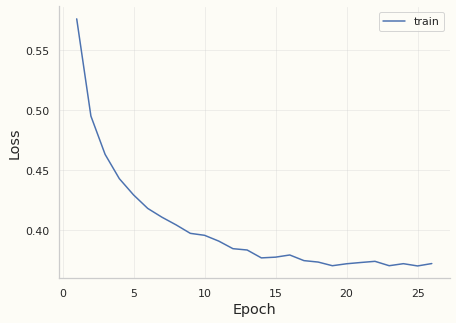

In [53]:
## Finalizing Training
if exp_config['finalize']:
    ## Plot Losses
    plot_losses(losses)

<a id ="6"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>6. Prediction</center></h1>
[Back to the TOC](#toc)

In [54]:
## Prediction
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

preprocessor.eval()
model.eval()
model.to(device)

probas = []

for data in (test_dl):
    x_nums, x_cats = preprocessor(data)
    x_nums = x_nums.to(device)
    x_cats = x_cats.to(device)
    
    with torch.set_grad_enabled(False):
        outputs = model(x_nums, x_cats)
        outputs = torch.squeeze(outputs)
        outputs = outputs.to('cpu').detach().numpy().copy()
        probas.append(outputs)
        
## post-processing
probas = np.concatenate(probas) 
preds = np.where(probas > 0.5, True, False)
submission_df['Transported'] = preds
submission_df.to_csv('submission_cv.csv', index=False)
submission_df.head(10)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True
